<span style="font-size:large;">
<div style="text-align: right">IM-UH 1511 <b>Introduction to Digital Humanities</b><br/>
Student name: <span style="color:blue"><b>Benjamin Pang</b></span><br/>
Grade: <span style="color:red"><b></b></span><br/><br/></div>

## <span style="color:red">HOMEWORK 2</span>
# <span style="color:green">Network of Co-Occurring Words (Word-Net) in Sentences of the Text

In [1]:
import time
start_time = time.perf_counter()
import urllib, os, codecs, random, operator, re, string, copy, dateutil.parser, itertools, pickle, datetime, math, pandas as pd, numpy as np, matplotlib.pyplot as plt
from collections import Counter
from string import punctuation, digits
import pathlib
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_lg')
import inflect
import nltk
from nltk import word_tokenize
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx
from wordcloud import WordCloud
import matplotlib as mpl
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.simplefilter('ignore')

### Load Data

In [2]:
# get your working directory
home = str(pathlib.Path.cwd())

# create a path to which the file will be written
text_path = os.path.join(home, 'WizardofOz.txt')

# location of the project gutenberg copy of the moby-dick text file
# text_url = 'http://www.gutenberg.org/cache/epub/55/pg55.txt'

# urllib.request.urlretrieve(text_url, text_path)

print('Downloaded to:', text_path)

Downloaded to: /home/x/idh/hw2/WizardofOz.txt


In [3]:
f = codecs.open(text_path, "r", encoding="utf-8").readlines()
for line in f:
    if line.startswith("1.  The Cyclone"):
        print(f.index(line)) #198
    if line.startswith("And oh, Aunt Em!  I'm so glad to be at home again!"):
        print(f.index(line)) #15514

109
4753


In [4]:
ff=f[109:4756]
ff

['1.  The Cyclone\r\n',
 '\r\n',
 '\r\n',
 'Dorothy lived in the midst of the great Kansas prairies, with Uncle\r\n',
 "Henry, who was a farmer, and Aunt Em, who was the farmer's wife.  Their\r\n",
 'house was small, for the lumber to build it had to be carried by wagon\r\n',
 'many miles.  There were four walls, a floor and a roof, which made one\r\n',
 'room; and this room contained a rusty looking cookstove, a cupboard for\r\n',
 'the dishes, a table, three or four chairs, and the beds.  Uncle Henry\r\n',
 'and Aunt Em had a big bed in one corner, and Dorothy a little bed in\r\n',
 'another corner.  There was no garret at all, and no cellar--except a\r\n',
 'small hole dug in the ground, called a cyclone cellar, where the family\r\n',
 'could go in case one of those great whirlwinds arose, mighty enough to\r\n',
 'crush any building in its path.  It was reached by a trap door in the\r\n',
 'middle of the floor, from which a ladder led down into the small, dark\r\n',
 'hole.\r\n',
 '

In [5]:
ff[-10:]

['Aunt Em had just come out of the house to water the cabbages when she\r\n',
 'looked up and saw Dorothy running toward her.\r\n',
 '\r\n',
 '"My darling child!" she cried, folding the little girl in her arms and\r\n',
 'covering her face with kisses.  "Where in the world did you come from?"\r\n',
 '\r\n',
 '"From the Land of Oz," said Dorothy gravely.  "And here is Toto, too.\r\n',
 'And oh, Aunt Em!  I\'m so glad to be at home again!"\r\n',
 '\r\n',
 '\r\n']

In [6]:
text="\r\n".join(ff)
text

'1.  The Cyclone\r\n\r\n\r\n\r\n\r\n\r\nDorothy lived in the midst of the great Kansas prairies, with Uncle\r\n\r\nHenry, who was a farmer, and Aunt Em, who was the farmer\'s wife.  Their\r\n\r\nhouse was small, for the lumber to build it had to be carried by wagon\r\n\r\nmany miles.  There were four walls, a floor and a roof, which made one\r\n\r\nroom; and this room contained a rusty looking cookstove, a cupboard for\r\n\r\nthe dishes, a table, three or four chairs, and the beds.  Uncle Henry\r\n\r\nand Aunt Em had a big bed in one corner, and Dorothy a little bed in\r\n\r\nanother corner.  There was no garret at all, and no cellar--except a\r\n\r\nsmall hole dug in the ground, called a cyclone cellar, where the family\r\n\r\ncould go in case one of those great whirlwinds arose, mighty enough to\r\n\r\ncrush any building in its path.  It was reached by a trap door in the\r\n\r\nmiddle of the floor, from which a ladder led down into the small, dark\r\n\r\nhole.\r\n\r\n\r\n\r\nWhen Dor

In [7]:
titlename = "L. Frank Baum's The Wonderful Wizard of Oz"

words = word_tokenize(text)
nuw=len(words)
uw=len(set(words))
print("%s contains %i nonunique and %i unique words"%(titlename,nuw,uw))

L. Frank Baum's The Wonderful Wizard of Oz contains 46908 nonunique and 3182 unique words


### Extraction of Proper Nouns

In [8]:
p = inflect.engine()
d_tags = {}

docs_d={"WizardofOz":text}
for key, value in docs_d.items():
    arr = []
    doc = nlp(value.replace('\n',''))
    #Keep these types of nlp entities
    keep_l = ['PERSON'] #,'NORP','PRODUCT','ORG']
    #Typo/model error + german corrections
    drop_t = []
    
    #Things inflect library handles poorly or to exclude from touching
    ex_ls = []
    
    for X in doc.ents:
        s1 = X.text
        if (X.label_ in keep_l) and (s1.lower() not in drop_t) and (s1):
            arr.append((s1, X.label_))
    d_tags[key] = arr
# pprint(d_tags)
names=[]
for k,v in d_tags.items():
    for vv in v:
        if vv[0] not in names:
            p=vv[0].replace("'","")
            p=p.title()
            names.append(p)
names=sorted(set(names))
print(len(names))
names

66


['A Ball Of Fire',
 'A Golden Cap',
 'Aunt Em',
 'Aunt Ems',
 'Boq',
 'Brook',
 'Cap',
 'Dorothy',
 'Dorothy\r\r',
 'Dorothy Wept',
 'Dorothy.\r\r\r\r',
 'Gates',
 'Gayelette',
 'Glinda',
 'Hammer',
 'Head',
 'Hel-Lo',
 'Henry',
 'Hill',
 'Hol-Lo',
 'I Am Oz',
 'Joker',
 'Kalidahs',
 'Lady',
 'Lain',
 'Lion',
 'Meek',
 'Munchkin',
 'Nick',
 'Oz',
 'Peck',
 'Quadlings',
 'Queen',
 'Quelala',
 'Scarecrow',
 'Sorrowfully Dorothy',
 'Stork',
 'The Cowardly Lion',
 'The Guardian Of The Gates',
 'The King Crow',
 'The King Of Beasts',
 'The King Of The Monkeys',
 'The King Of The Winged',
 'The Monkey King',
 'The Queen Of All The Field Mice',
 'The Queen Of The Mice',
 'The Tin\r\rWoodman',
 'The Tin Woodman',
 'The Tin Woodmans',
 'The Wicked Witch',
 'The Wicked Witch Of The West',
 'The Witch Of The North',
 'This Golden Cap',
 'Tin',
 'Tin Woodman',
 'Toto',
 'Uncle',
 'Uncle Henry',
 'Winkies',
 'Witch',
 'Wizard',
 'Wizard Oz',
 'Wolf',
 'Woodchopper',
 'Woodman',
 'Zuz-Zy']

In [9]:
rem=[]
for p in names:
    if "_" in p:
        rem.append(p)
    if "--" in p:
        rem.append(p)
    if p not in text:
        rem.append(p)
names=[p for p in names if p not in rem]
pp=[q for q in itertools.product(names,names) if q[0]!=q[1]]
for q in pp:
    if q[0] in q[1]:
        rem.append(q[0])
    if q[1] in q[0]:
        rem.append(q[1])
    w=q[0]+" "+q[1]
    if w in text:
        names.append(w)
        rem.append(q[0])
        rem.append(q[1])
names=[p for p in names if p not in rem]
names=sorted(set(names))
print(len(names))
sorted(names)

27


['Aunt Em',
 'Boq',
 'Gates',
 'Gayelette',
 'Hammer',
 'Head Dorothy',
 'Joker',
 'Kalidahs',
 'Lady',
 'Meek',
 'Munchkin',
 'Quadlings',
 'Queen',
 'Quelala',
 'Scarecrow',
 'Sorrowfully Dorothy',
 'Stork',
 'The Cowardly Lion',
 'The King Crow',
 'The Tin Woodman',
 'The Wicked Witch',
 'This Golden Cap',
 'Toto',
 'Uncle Henry',
 'Winkies',
 'Witch Glinda',
 'Wizard Oz']

In [10]:
rem=['Wizard Oz', 'Gates', 'Hammer', 'Head Dorothy', 'Kalidahs', 'Lady', 'Meek', 'Munchkin', 'Sorrowfully Dorothy', 
    'tin man', 'Joker', 'This Golden Cap', 'The Wicked Witch','The Cowardly Lion', 'Witch Glinda', 'The Tin Woodman',
    'The King Crow', 'Stork', 'Good Witch of the North', 'Quadlings']
names=[p for p in names if p not in rem]
names=names+['Tin Woodman', 'Scarecrow', 'Oz', 'Guardian of the Gates', 'Mr. Joker','Wicked Witch of the East',
             'Wicked Witch of the West', 'Glinda', 'Dorothy', 'Lion', 'King Crow', 'King of the Winged Monkeys',
             'Witch of the North', 'Hammer-Heads', 'Quadlings', 'Winkies', 'Stork', 'Kalidahs', 'Great Wizard', 'Wizard',
            'green girl', 'Monkey King', 'Munchkins', 'Cowardly Lion', 'Wildcat', 'tin man','Wizard']
    
        
names=sorted(set(names)) 
print(len(names))
names

33


['Aunt Em',
 'Boq',
 'Cowardly Lion',
 'Dorothy',
 'Gayelette',
 'Glinda',
 'Great Wizard',
 'Guardian of the Gates',
 'Hammer-Heads',
 'Kalidahs',
 'King Crow',
 'King of the Winged Monkeys',
 'Lion',
 'Monkey King',
 'Mr. Joker',
 'Munchkins',
 'Oz',
 'Quadlings',
 'Queen',
 'Quelala',
 'Scarecrow',
 'Stork',
 'Tin Woodman',
 'Toto',
 'Uncle Henry',
 'Wicked Witch of the East',
 'Wicked Witch of the West',
 'Wildcat',
 'Winkies',
 'Witch of the North',
 'Wizard',
 'green girl',
 'tin man']

In [11]:
nfreq=[]
for i in names: 
    nfreq.append(text.count(i))
pnf_df = pd.DataFrame(
    {'Proper Nouns': names, 
     'Frequency of Occurrences': nfreq
    })
pnf_df=pnf_df[['Proper Nouns','Frequency of Occurrences']]
pnf_df=pnf_df.sort_values(by ='Frequency of Occurrences',ascending=False)
# trf_df=trf_df[trf_df["Frequency of Occurrences"]>10]
print(len(pnf_df))
pnf_df[:50]

33


,Proper Nouns,Frequency of Occurrences
3,Dorothy,366
20,Scarecrow,224
12,Lion,179
16,Oz,158
22,Tin Woodman,109
23,Toto,93
30,Wizard,37
28,Winkies,29
0,Aunt Em,22
2,Cowardly Lion,21


In [12]:
pnf_df.to_csv('Names_freqs.csv')

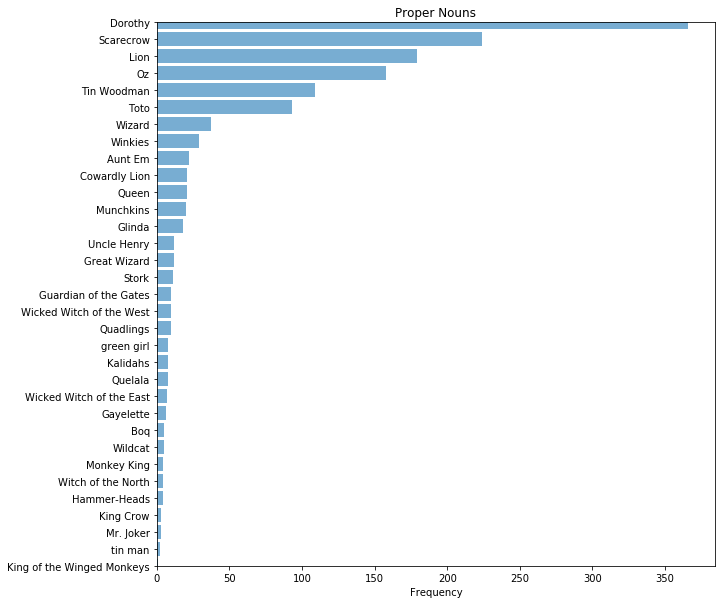

In [13]:
x = pnf_df.set_index('Proper Nouns').T.to_dict() 
x=sorted([(k,v['Frequency of Occurrences']) for k,v in x.items()], key=lambda x: x[1],reverse=True)
keys = [i for (i,j) in x] 
y_pos = np.arange(len(keys))
performance = [j for (i,j) in x] 
plt.figure(figsize=(10,10))
ax = plt.axes()
plt.barh(y_pos, performance, align='center', alpha=0.6) 
ax.invert_yaxis()
plt.yticks(y_pos, keys)
plt.xlabel('Frequency')
plt.title('Proper Nouns')
plt.show()

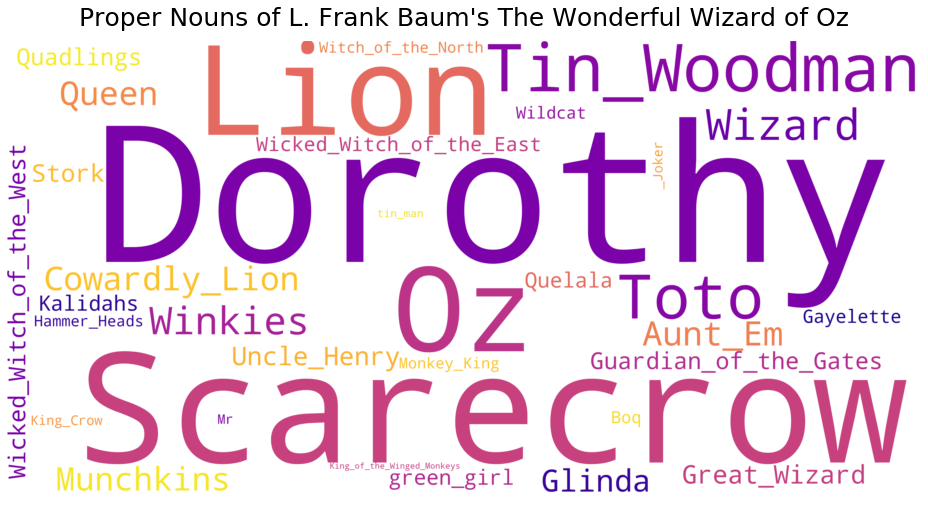

In [14]:
t=[]
for (i,j) in x:
    for k in range(j):
#         print i.replace(" ","_").replace("-","_")
        t.append(i.replace(" ","_").replace("-","_"))
ttd=' '.join(t)
wordcloud = WordCloud(collocations=False,background_color="white",colormap="plasma",width=4000,height=2000).generate(ttd)
fig = plt.figure(figsize=(13,13))
default_colors = wordcloud.to_array()
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
ss="Proper Nouns of %s" %titlename
plt.suptitle(ss,fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 1.4]) 
plt.show()

### Dictionary of Aliased Proper Nouns

In [15]:
alias_dict={}
for n in names:
    if n=="Tin Woodman":
        alias_dict[n]="tin man"
    elif n=="tin man":
        alias_dict[n]="tin man"
    elif n=="Oz":
        alias_dict[n]="Oz"
    elif n=="Wizard":
        alias_dict[n]="Oz"
    elif n=="Great Wizard":
        alias_dict[n]="Oz"
    elif n=="Cowardly Lion":
        alias_dict[n]="Lion"
    elif n=="Lion":
        alias_dict[n]="Lion"
    elif n=="King of the Winged Monkeys":
        alias_dict[n]="Monkey King"
    elif n=="Monkey King":
        alias_dict[n]="Monkey King"
    else:
        alias_dict[n]=n
print("The dictionary of aliases has %i keys (names) and %i unique values (aliased proper nouns)" %(len(alias_dict.keys()),len(set(alias_dict.values()))))
# for k,v in alias_dict.items():
#     print(k,"-->",v)

The dictionary of aliases has 33 keys (names) and 28 unique values (aliased proper nouns)


### The Network of Sententially Co-Occurring Proper Names ("Word-Net")

In [16]:
blob = TextBlob(text)
textSentences = blob.sentences
sendic=dict()
for i,v in enumerate(textSentences):
    sent=v.sentiment.polarity
    wl=[]
    for term in list(set(alias_dict.values())):
        if term in v: 
            wl.append(term)
    if len(wl)>1:
        sendic[i]=wl 
medges=[]
for k,v in sendic.items():
    sent=textSentences[k].sentiment.polarity
    dd={}
    ps=set()
    for j in itertools.combinations(v, 2):
        ps.add(j)
        dd[j]=(k,sent)
    for jj in ps:
        s=0
        ss=0
        for kk,vv in dd.items():
            if kk==jj:
                s+=1
                ss+=vv[1]
        if alias_dict[jj[0]]!=alias_dict[jj[1]]:
            medges.append((alias_dict[jj[0]],alias_dict[jj[1]],"Sentence_"+str(k),ss/float(s)))
print("%s contains %i sentential co-occurrences among %i aliased proper nouns"%(titlename,len(medges),len(set(alias_dict.values()))))
medges

L. Frank Baum's The Wonderful Wizard of Oz contains 315 sentential co-occurrences among 28 aliased proper nouns


[('Aunt Em', 'Dorothy', 'Sentence_1', 0.8),
 ('Aunt Em', 'Uncle Henry', 'Sentence_4', -0.09375),
 ('Uncle Henry', 'Dorothy', 'Sentence_4', -0.09375),
 ('Aunt Em', 'Dorothy', 'Sentence_4', -0.09375),
 ('Toto', 'Dorothy', 'Sentence_20', 0.0875),
 ('Toto', 'Dorothy', 'Sentence_22', 0.32499999999999996),
 ('Toto', 'Dorothy', 'Sentence_25', 0.0),
 ('Uncle Henry', 'Dorothy', 'Sentence_27', 0.016666666666666666),
 ('Toto', 'Dorothy', 'Sentence_38', 0.0),
 ('Toto', 'Dorothy', 'Sentence_40', 0.0),
 ('Dorothy', 'Munchkins', 'Sentence_59', 0.05),
 ('Uncle Henry', 'Dorothy', 'Sentence_76', 0.1),
 ('Dorothy', 'Munchkins', 'Sentence_80', 0.30892857142857144),
 ('Aunt Em', 'Dorothy', 'Sentence_123', 0.0),
 ('Dorothy', 'Munchkins', 'Sentence_140', 0.05),
 ('Dorothy', 'Munchkins', 'Sentence_152', 0.25),
 ('Toto', 'Dorothy', 'Sentence_188', -0.05714285714285714),
 ('Scarecrow', 'Dorothy', 'Sentence_191', 0.0),
 ('Dorothy', 'Munchkins', 'Sentence_225', 0.6),
 ('Boq', 'Dorothy', 'Sentence_226', 0.375),
 (

In [17]:
medgesd=[]
for e in medges:
    d={}
    d['Sentence']=e[2]
    d['Average sentiment']=e[3]
    medgesd.append((e[0],e[1],d))
    
G = nx.MultiGraph()
G.add_edges_from(medgesd)
for e in G.edges(data=True):
    if e[0]==e[1]:
        G.remove_edge(e[0],e[1])
weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)

print("The graph of sententially co-occurrent proper nouns in %s is a weighted graph and it has %i nodes and %i edges \n" %(titlename,len(Gw.nodes()),len(Gw.edges())))
out=' '.join([n+"\n" for n in alias_dict.values() if n not in Gw.nodes()])
print("The proper names which do not co-occur in sentences are: \n %s" %out)
# print "Graph Gw is a weighted graph with %i nodes and %i edges" %(len(Gw.nodes()),len(Gw.edges()))
print("The density of this graph is %.3f" %nx.density(Gw))
if nx.is_connected(Gw)==True:
    print ("This graph is a connected graph")
else:
    print ("This graph is a disconnected graph and it has",nx.number_connected_components(Gw),"connected components" )   
giant = max((Gw.subgraph(c) for c in nx.connected_components(Gw)), key=len)
Gwlcc=Gw.subgraph(giant)
print ("The largest connected component of this graph is a weighted graph with %i nodes and %i edges" %(len(Gwlcc.nodes()),len(Gwlcc.edges())))
print ("The density of the largest connected component of this graph is %.3f" %nx.density(Gwlcc))

The graph of sententially co-occurrent proper nouns in L. Frank Baum's The Wonderful Wizard of Oz is a weighted graph and it has 27 nodes and 58 edges 

The proper names which do not co-occur in sentences are: 
 Witch of the North

The density of this graph is 0.165
This graph is a disconnected graph and it has 3 connected components
The largest connected component of this graph is a weighted graph with 23 nodes and 56 edges
The density of the largest connected component of this graph is 0.221


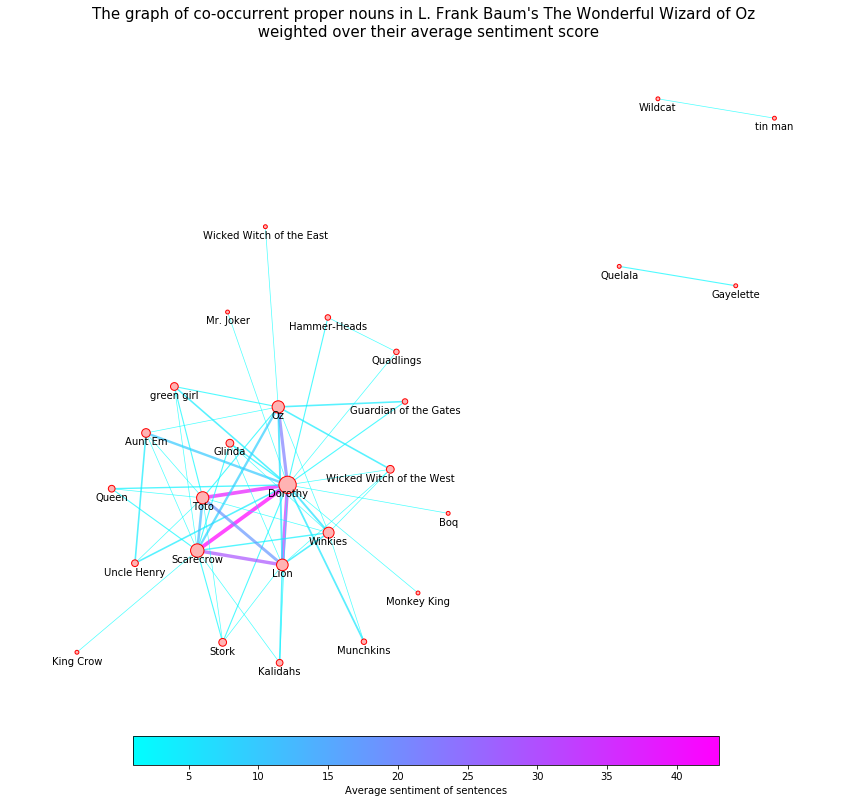

In [18]:
edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
edge_width=[math.log(1+w) for w in edge_width]
cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in Gw.edges(data=True) ]
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
# width_list=[2*math.log(2+w) for w in weight_list]
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list
nsi=[15*Gw.degree(n) for n in Gw.nodes()]

figsize=(15,15)
pos=graphviz_layout(Gw) 
node_color="#ffb3b3"
node_border_color="r"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gw, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, pos, edge_color=edge_color,edge_cmap=cmap,vmin=vmin, vmax=vmax,width=edge_width,alpha=0.7)
plt.axis('off');
yoffset = {}
y_off = -5 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset,font_size=10);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
cbar.set_label('Average sentiment of sentences')
sst="The graph of co-occurrent proper nouns in %s \n weighted over their average sentiment score" %titlename
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

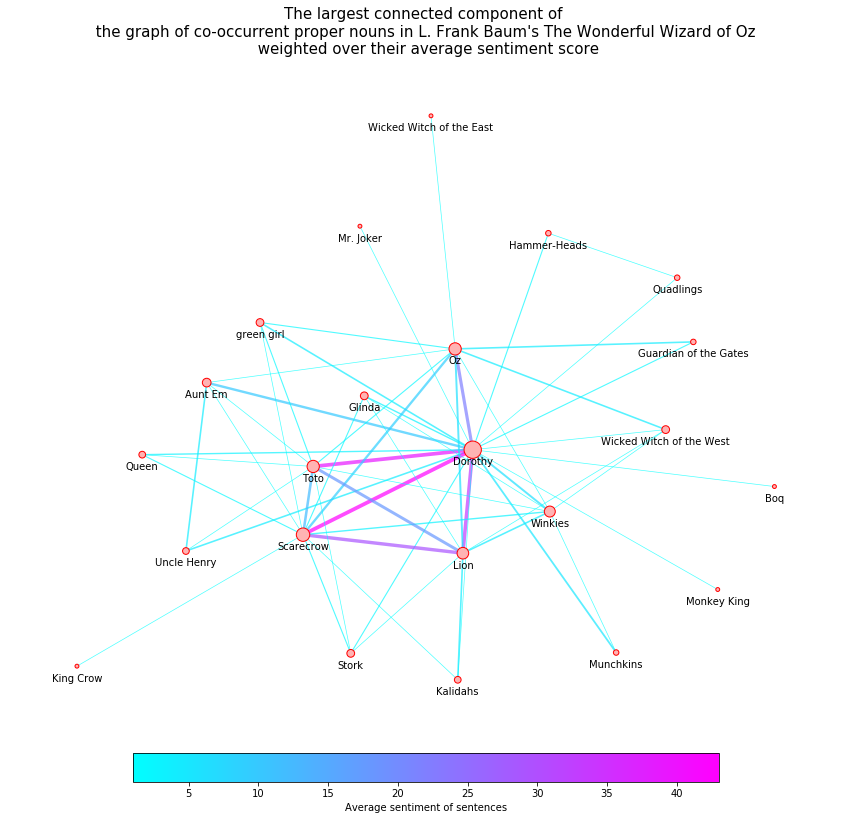

In [19]:
Gw=Gwlcc

edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
edge_width=[math.log(1+w) for w in edge_width]
cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in Gw.edges(data=True) ]
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
# width_list=[2*math.log(2+w) for w in weight_list]
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list
nsi=[15*Gw.degree(n) for n in Gw.nodes()]

figsize=(15,15)
pos=graphviz_layout(Gw) 
node_color="#ffb3b3"
node_border_color="r"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gw, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, pos, edge_color=edge_color,edge_cmap=cmap,vmin=vmin, vmax=vmax,width=edge_width,alpha=0.7)
plt.axis('off');
yoffset = {}
y_off = -5 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset,font_size=10);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
cbar.set_label('Average sentiment of sentences')
sst="The largest connected component of \n the graph of co-occurrent proper nouns in %s \n weighted over their average sentiment score" %titlename
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

In [20]:
print("Run in %.2f seconds (%.2f minutes)" %(time.clock() - start_time,(time.clock() - start_time)/60))

Run in -802192.05 seconds (-13369.87 minutes)
